In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
data = np.loadtxt("ex1data1.txt", delimiter=",")

In [7]:
X, y = data[:,0], data[:,1]
m = y.size

Text(0, 0.5, 'Profit in $10,000s')

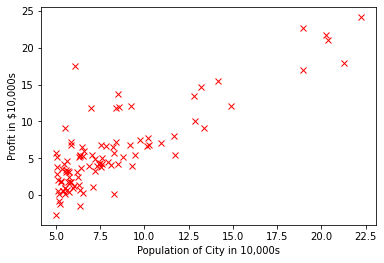

In [8]:
plt.plot(X,y,"x",color="red")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

In [9]:
X = np.stack([np.ones(m), X], axis=1)
theta = np.array([0.0, 0.0])

In [10]:
# create cost calculation function
def computeCost(X, y, theta):
    J = (1/(2 * m)) * sum((X @ theta - y)**2)
    return(J)

In [11]:
# create gradient descent function
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history =  [] #store cost values of previous thetas

    for i in range(num_iters):
        theta = theta - (alpha/m) * (X @ theta - y) @ X

        J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [12]:
# test the compute cost function - the result matches the Matlab homework
computeCost(X,y,theta)

32.072733877455654

In [13]:
# test the gradient descent function - again matches Matlab results
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: -3.6303, 1.1664


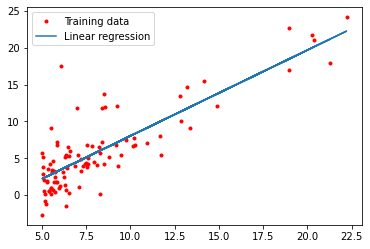

In [14]:
plt.plot(X[:, 1], y, ".", color="red")
plt.plot(X[:,1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression'])

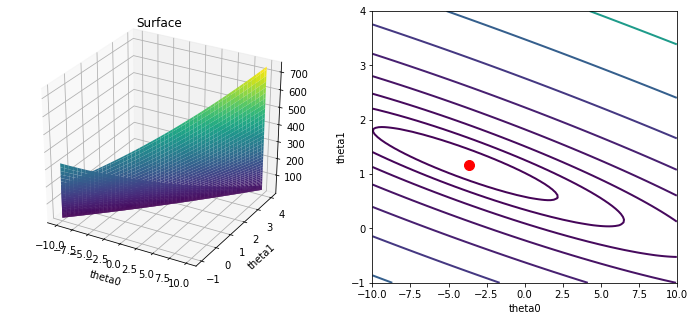

In [15]:
# Plot J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# needs to be transposed for plotting
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

# Multiple Features

In [16]:
data2 = np.loadtxt("ex1data2.txt", delimiter=",")

X2 = data2[:, :2]
y2 = data2[:, 2]
m2 = y2.size

In [17]:
# create functionto normalize features
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [18]:
X_norm, mu, sigma = featureNormalize(X2)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [61]:
# There are questions about creating new functions for computing cost and gradient desecent for multiple features, but these are baiscally trick questions - if the compute cost and gradient descent functions are properly vectorized, the single feature versions generalize to multiple features with no modification.

In [19]:
# add intercept to X
X2 = np.concatenate([np.ones((m2,1)), X_norm], axis=1)
theta2 = np.zeros(3)

In [20]:
theta, J_history = gradientDescent(X2, y2, theta2, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 340412.5630, 109370.0567, -6500.6151


# Normal Equation

In [21]:
# Create a function to do regression via the normal equation rather than gradient descent
def normalEqn(X, y):
    thetas = np.zeros(X.shape[1])
    thetas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return thetas

In [22]:
# test - the results are pretty similar to gradient descent, but not identical
normalEqn(X2, y2)

array([340412.65957447, 109447.79646964,  -6578.35485416])